## Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

 Important: Tingues en compte que prèviament et caldrà preparar el dataset.

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

df = pd.read_csv('Documents/Publicacions Facebook Thailandia.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

- status_id: Esta variable parece representar un identificador único para cada estado o publicación.
- status_type: Probablemente representa el tipo de estado, como texto, foto, video, etc.
- status_published: contiene la marca de tiempo o fecha en que se publicó el estado.
- num_reactions:  representa el número de reacciones que recibió el estado. Parece ser una variable de recuento.
- num_comments: Similar a num_reactions, representa el número de comentarios que recibió el estado.
- num_shares: representa el número de veces que se compartió el estado.
- num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys: Estas son todas variable que representan el recuento de diferentes tipos de reacciones (me gusta, encanta, sorprende, jaja, triste, enojado) que recibió el estado.
- Column1, Column2, Column3, Column4: Estas columnas parecen estar presentes, pero actualmente no contienen ningún valor (todas tienen 0 entradas no nulas).  Es posible que estas columnas se hayan agregado por alguna razón, pero actualmente no contienen datos.

In [3]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [4]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
df.duplicated().sum()

51

In [6]:
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

- Las últimas cuatro columnas (Column1 a Column4) parecen estar presentes pero actualmente vacías, se pueden excluir del análisis.
- hay 51 duplicados que también eliminaremos.
- status_id no es necesaria para el analisis 
- status_types crearemos dummies
- finalmente realizaremos estandarización

In [7]:
# Eliminar duplicados
df.drop_duplicates(subset='status_id', inplace=True)
df.duplicated().sum()

0

In [8]:
df = df.drop(['status_id', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       6997 non-null   object
 1   status_published  6997 non-null   object
 2   num_reactions     6997 non-null   int64 
 3   num_comments      6997 non-null   int64 
 4   num_shares        6997 non-null   int64 
 5   num_likes         6997 non-null   int64 
 6   num_loves         6997 non-null   int64 
 7   num_wows          6997 non-null   int64 
 8   num_hahas         6997 non-null   int64 
 9   num_sads          6997 non-null   int64 
 10  num_angrys        6997 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 656.0+ KB


In [9]:
df.isnull().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

#### dummies

In [10]:
df = pd.get_dummies(df, columns=['status_type'], drop_first=True, dtype= int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   status_published    6997 non-null   object
 1   num_reactions       6997 non-null   int64 
 2   num_comments        6997 non-null   int64 
 3   num_shares          6997 non-null   int64 
 4   num_likes           6997 non-null   int64 
 5   num_loves           6997 non-null   int64 
 6   num_wows            6997 non-null   int64 
 7   num_hahas           6997 non-null   int64 
 8   num_sads            6997 non-null   int64 
 9   num_angrys          6997 non-null   int64 
 10  status_type_photo   6997 non-null   int32 
 11  status_type_status  6997 non-null   int32 
 12  status_type_video   6997 non-null   int32 
dtypes: int32(3), int64(9), object(1)
memory usage: 683.3+ KB


In [11]:
df

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0,0,1
1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1,0,0
2,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0,0,1
3,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1,0,0
4,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,1,0,0
7046,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,1,0,0
7047,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,1,0,0
7048,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1,0,0


#### outliers

C:\Users\nuria\AppData\Local\Temp\ipykernel_5024\1073018009.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\nuria\AppData\Local\Temp\ipykernel_5024\1073018009.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\nuria\AppData\Local\Temp\ipykernel_5024\1073018009.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\nuria\AppData\Local\Temp\ipykernel_5024\1073018009.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\nuria\AppData\Local\Temp\ipykernel_5024\1073018009.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\nuria\AppData\Local\Temp\ipykernel_5024\1073018009.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\nuria\AppData\Local\Temp\ipykernel_5024\1073018009.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\nuria\AppDa

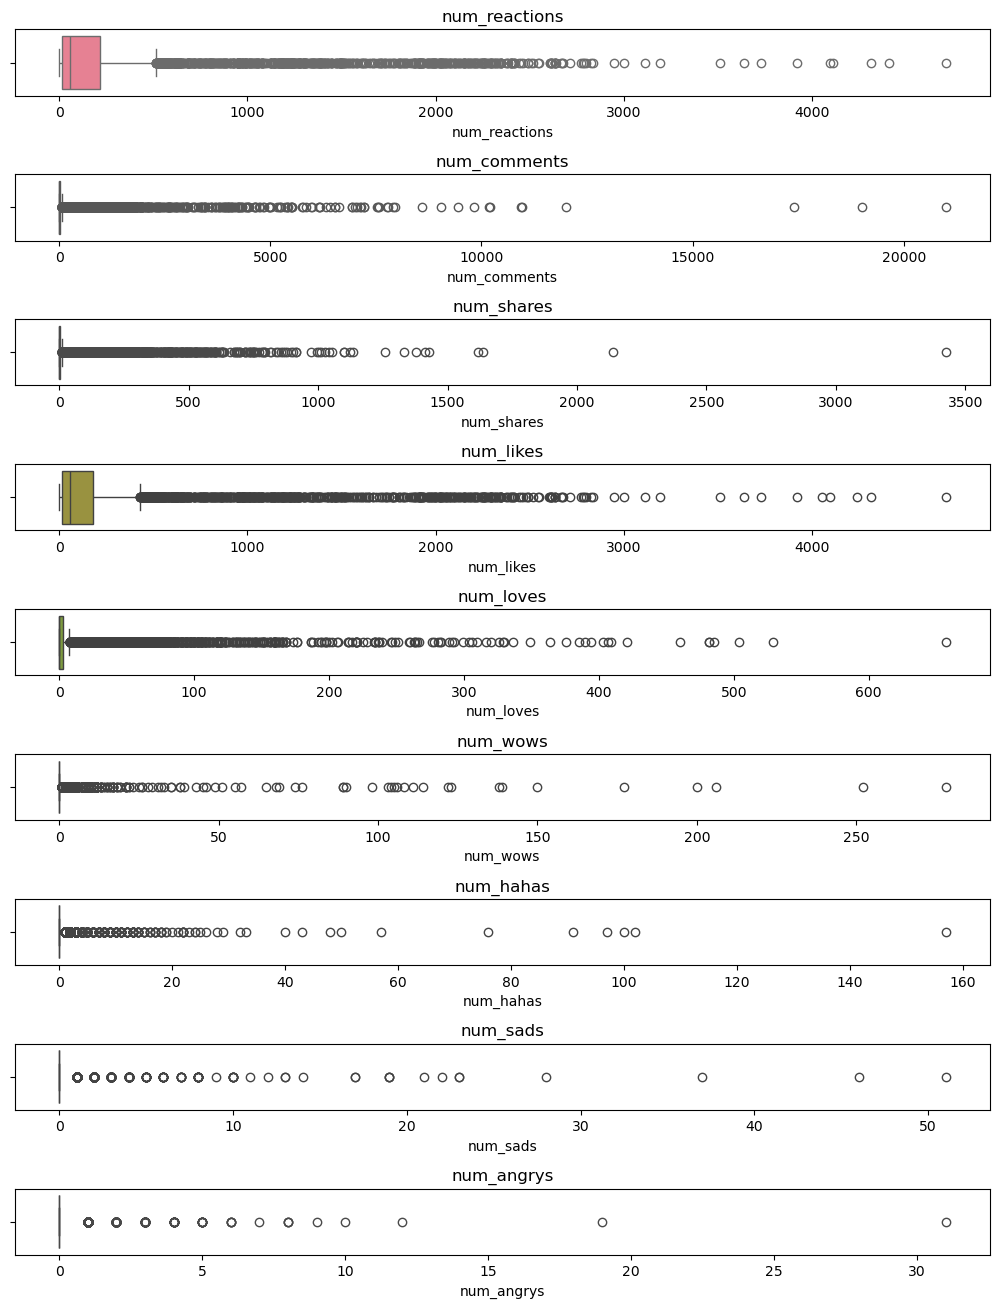

In [12]:
df_int = df[['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys']]

plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df_int.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()
    

Todas las variable tienen outliers

#### prueba normalidad

In [13]:
H0 = "Los datos de la variable siguen una distribución normal"
H1 = "Los datos de la variable NO siguen una distribución normal"

for i in df_int.columns:
    stat, p = shapiro(df[column])
    alpha = 0.05
    if p > alpha:
        print(f'Los datos de la variable {i} siguen una distribución normal.')
    else:
        print(f'Los datos de la variable {i} NO siguen una distribución normal.')
 
   

Los datos de la variable num_reactions NO siguen una distribución normal.
Los datos de la variable num_comments NO siguen una distribución normal.
Los datos de la variable num_shares NO siguen una distribución normal.
Los datos de la variable num_likes NO siguen una distribución normal.
Los datos de la variable num_loves NO siguen una distribución normal.
Los datos de la variable num_wows NO siguen una distribución normal.
Los datos de la variable num_hahas NO siguen una distribución normal.
Los datos de la variable num_sads NO siguen una distribución normal.
Los datos de la variable num_angrys NO siguen una distribución normal.


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Ninguna de la variables sigue una distribución normal.


usaremos RobustScaler para estandarizar las variables ya que que no siguen una distribución normal y tienen outliers.

In [14]:
robust_scaler = RobustScaler()
variables_con_outliers = ['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'] 
df[variables_con_outliers] = robust_scaler.fit_transform(df[variables_con_outliers])
df

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,4/22/2018 6:00,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,1
1,4/21/2018 22:45,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,1,0,0
2,4/21/2018 6:17,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,1
3,4/21/2018 2:29,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,1,0,0
4,4/18/2018 3:22,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,9/24/2016 2:58,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,1,0,0
7046,9/23/2016 11:19,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,1,0,0
7047,9/21/2016 23:03,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,1,0,0
7048,9/20/2016 0:43,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,1,0,0


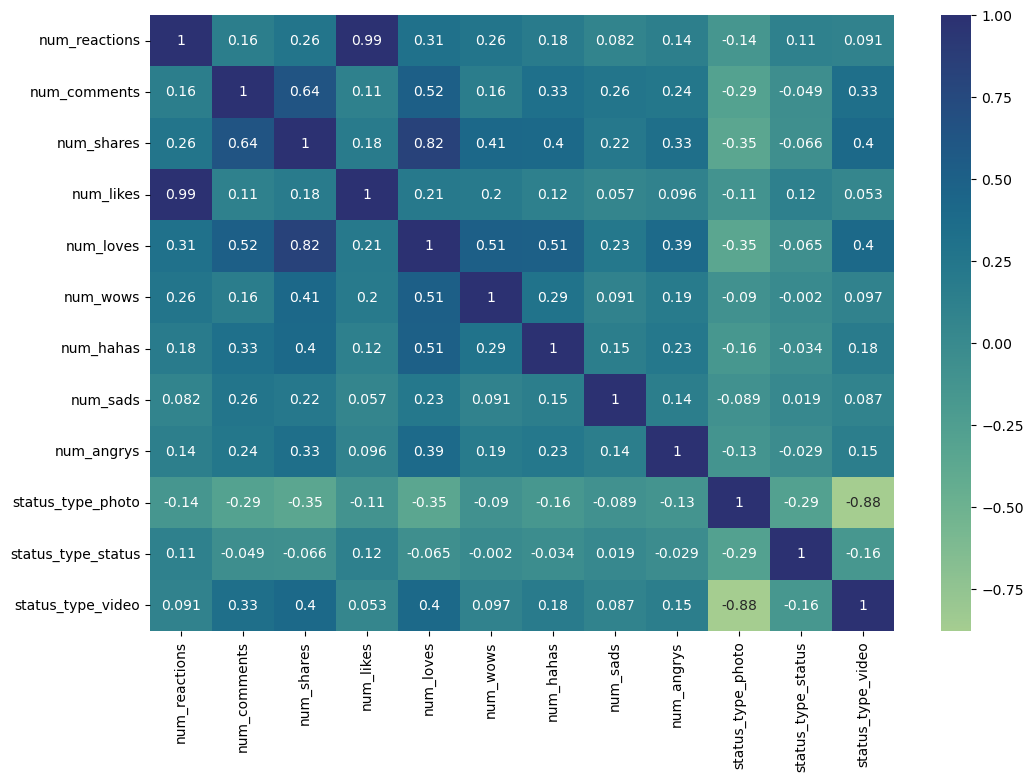

In [15]:
corr = df[['num_reactions','num_comments','num_shares',
           'num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys',
           'status_type_photo','status_type_status','status_type_video']].corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap="crest",annot=True);


num_likes y num_reactions tienen una correlación de 0,99. indica una relación prácticamente perfecta y positiva entre estas dos variables. La cantidad de "me gusta" (num_likes) está altamente correlacionada con el número total de reacciones (num_reactions). En otras palabras, cuando una de estas variables aumenta, la otra tiende a aumentar en la misma proporción, y viceversa.

num_loves y num_shares tienen un 0.82 de correlación. Cuanto más num_loves tiene una publicación más se comparte.

In [16]:
pca = PCA().fit(df_int)
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)

Varianza explicada por cada componente principal: [6.74071107e-01 3.16179904e-01 9.01430406e-03 6.66418937e-04
 5.45160493e-05 1.13832264e-05 1.99193787e-06 3.74381726e-07
 8.16156680e-10]


explained_variance_ratio_ nos proporciona la proporción de la varianza total explicada por cada componente principal. Este paso te ayudará a entender cuánta información se conserva en cada componente principal

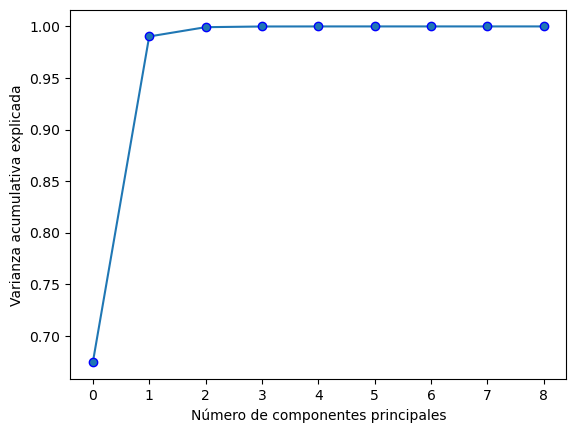

In [17]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(cumulative_explained_variance,marker = "o",markersize=6, markeredgecolor='blue')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulativa explicada')
plt.show()



Este tipo de gráfico es útil para determinar cuántos componentes principales son necesarios para retener una cantidad significativa de la varianza en los datos. La pendiente de la curva en el gráfico indica cómo la varianza acumulativa cambia a medida que se agregan más componentes principales. En general, se busca un punto donde la curva se estabilice o donde la ganancia adicional en la varianza explicada sea mínima, lo que puede ayudar a decidir cuántos componentes principales retener en un análisis de PCA.

Se podría seleccionar un solo componente ya que estariamos por encima del 95%, sin embargo con tal de poder explicar el 100% de la varianza seleccionaremos 2 componentes.

In [46]:
pca = PCA(n_components=2)
pca_num = pca.fit_transform(df_int)
df_pca = pd.DataFrame(data=pca_num, columns=[f'Componente Principal {i+1}' for i in range(2)])
df_pca


,Componente Principal 1,Componente Principal 2
0,370.680264,318.513435
1,-242.153241,-54.029698
2,11.614129,-4.216771
3,-251.910292,-108.281029
4,-227.171051,27.476559
...,...,...
6992,-257.414270,-138.884344
6993,-275.873486,-241.802100
6994,-279.266578,-260.587712
6995,-178.168471,222.333487


In [19]:
df_dummies = df[['status_type_photo', 'status_type_status', 'status_type_video']]
df_dummies.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)
df_kmeans = pd.concat([df_dummies, df_pca], axis=1)
df_kmeans

,status_type_photo,status_type_status,status_type_video,Componente Principal 1,Componente Principal 2
0,0,0,1,370.680264,318.513435
1,1,0,0,-242.153241,-54.029698
2,0,0,1,11.614129,-4.216771
3,1,0,0,-251.910292,-108.281029
4,1,0,0,-227.171051,27.476559
...,...,...,...,...,...
6992,1,0,0,-257.414270,-138.884344
6993,1,0,0,-275.873486,-241.802100
6994,1,0,0,-279.266578,-260.587712
6995,1,0,0,-178.168471,222.333487


### k-means

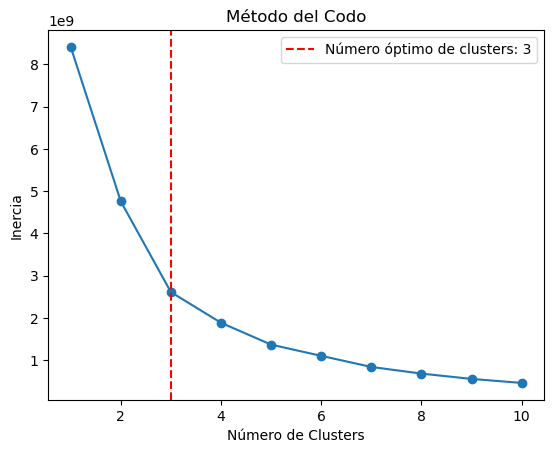

In [20]:
#establecer clusters- metodo codo

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Establecer n_init explícitamente
    kmeans.fit(df_kmeans)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
knee_l = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
plt.axvline(x=knee_l.elbow, color='red', linestyle='--', label=f'Número óptimo de clusters: {knee_l.elbow}')
plt.legend()
plt.show()


In [21]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(df_kmeans)
pred = kmeans.predict(df_kmeans)

In [22]:
df_kmeans['Clusters'] = pred
df_kmeans

,status_type_photo,status_type_status,status_type_video,Componente Principal 1,Componente Principal 2,Clusters
0,0,0,1,370.680264,318.513435,0
1,1,0,0,-242.153241,-54.029698,0
2,0,0,1,11.614129,-4.216771,0
3,1,0,0,-251.910292,-108.281029,0
4,1,0,0,-227.171051,27.476559,0
...,...,...,...,...,...,...
6992,1,0,0,-257.414270,-138.884344,0
6993,1,0,0,-275.873486,-241.802100,0
6994,1,0,0,-279.266578,-260.587712,0
6995,1,0,0,-178.168471,222.333487,0


In [ ]:
df_kmeans.info()

In [23]:
#principales aspectos del kmean

print("El SSE más bajo es", kmeans.inertia_)
print("Las localizaciones de los centroides son:" , kmeans.cluster_centers_)
print("El número de iteraciones hasta alcanzar la convergencia fue", kmeans.n_iter_)
print(df_kmeans['Clusters'].value_counts())

El SSE más bajo es 2609414972.01964
Las localizaciones de los centroides son: [[ 6.31084677e-01  4.36688058e-02  3.17577086e-01 -1.43432139e+02
  -1.34064580e+02]
 [ 7.29927007e-03  6.93889390e-18  9.92700730e-01  5.07646849e+03
  -6.07457799e+02]
 [ 4.43736730e-01  1.69851380e-01  3.56687898e-01  4.69027071e+02
   1.99524484e+03]]
El número de iteraciones hasta alcanzar la convergencia fue 9
Clusters
0    6389
2     471
1     137
Name: count, dtype: int64


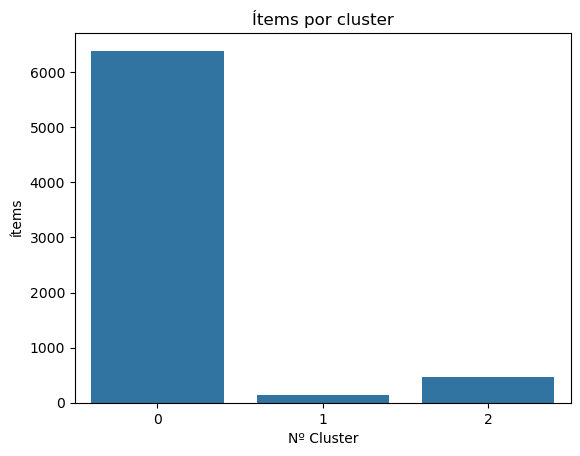

In [24]:
cluster = df_kmeans['Clusters'].value_counts()
sns.barplot(x=cluster.index, y=cluster.values)
plt.xlabel('Nº Cluster')
plt.ylabel('ítems')
plt.title('Ítems por cluster')
plt.show()

Los clusters 1 y 2 contienen pocos valores mientras que el cluster 0 es el que contiede más.

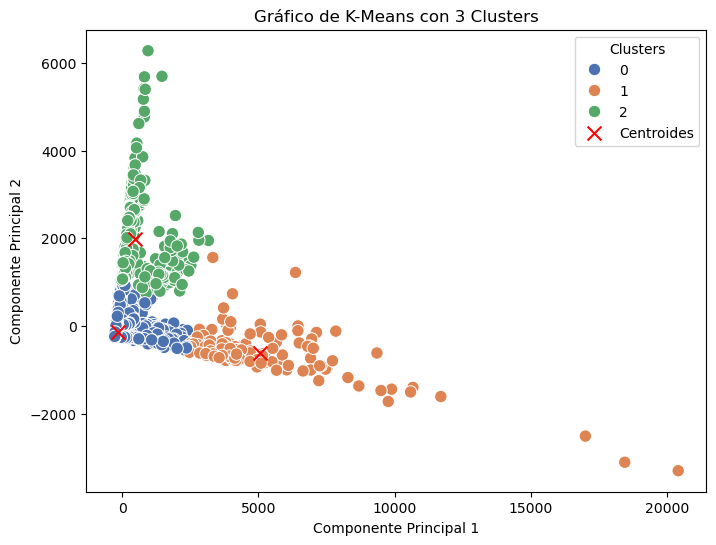

In [38]:
# Ajustar modelo K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_kmeans)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroides = kmeans.cluster_centers_

# Puntos coloreados por clúster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Clusters', data=df_kmeans, palette='deep', s=80)

# Marcadores de centroides
plt.scatter(centroides[:, 3], centroides[:, 4], c='red', marker='x', s=100, label='Centroides')

plt.title('Gráfico de K-Means con 3 Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clusters')

plt.show()

EL cluster 0 los datos están más agrupados mientras cluster 1 y 2 sus datos tienen más dispersión

## Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.


In [39]:
df_jer = df_kmeans.drop('Clusters', axis=1)
df_jer

,status_type_photo,status_type_status,status_type_video,Componente Principal 1,Componente Principal 2
0,0,0,1,370.680264,318.513435
1,1,0,0,-242.153241,-54.029698
2,0,0,1,11.614129,-4.216771
3,1,0,0,-251.910292,-108.281029
4,1,0,0,-227.171051,27.476559
...,...,...,...,...,...
6992,1,0,0,-257.414270,-138.884344
6993,1,0,0,-275.873486,-241.802100
6994,1,0,0,-279.266578,-260.587712
6995,1,0,0,-178.168471,222.333487


silhouette_score se utiliza para calcular el puntaje de la silueta para cada valor de n_clusters en el rango especificado. La gráfica resultante ayudará a visualizar cómo varía el puntaje de la silueta en función del número de clústeres, lo que puede ayudará a identificar un número óptimo de clústeres para los datos.

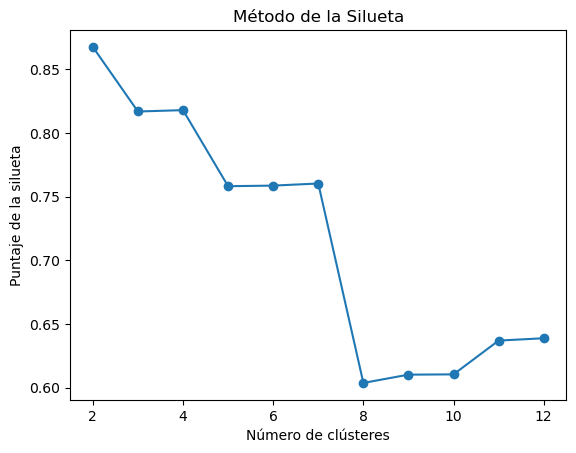

In [89]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 13):
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    silhouette_scores.append(silhouette_score(df_jer, labels))

# Grafica el método de la silueta
plt.plot(range(2, 13), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de clústeres')
plt.ylabel('Puntaje de la silueta')
plt.show()

Silhouette sugiere 2 clústeres. 

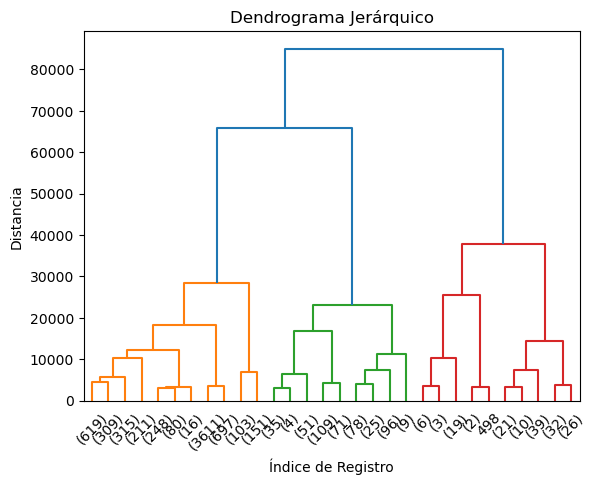

In [90]:


linked = linkage(df_jer, method='ward')
df_jer['cluster'] = fcluster(linked, 2, criterion='maxclust')

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='lastp')
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índice de Registro')
plt.ylabel('Distancia')
plt.show()

con el denograma no tendría visualmente claro cuantos clusters elegir. Al haber realizado Silhouette_score se ha podido determinar que el nº de cluster sea dos aunque la diferencia entre 2 y 3 es poca.

In [83]:
# Modelo clustering jerarquico:
jer = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
pred2 = jer.fit_predict(df_jer)
df_jer['Clusters2'] = pred2 
df_jer

,status_type_photo,status_type_status,status_type_video,Componente Principal 1,Componente Principal 2,Clusters2
0,0,0,1,370.680264,318.513435,0
1,1,0,0,-242.153241,-54.029698,0
2,0,0,1,11.614129,-4.216771,0
3,1,0,0,-251.910292,-108.281029,0
4,1,0,0,-227.171051,27.476559,0
...,...,...,...,...,...,...
6992,1,0,0,-257.414270,-138.884344,0
6993,1,0,0,-275.873486,-241.802100,0
6994,1,0,0,-279.266578,-260.587712,0
6995,1,0,0,-178.168471,222.333487,0


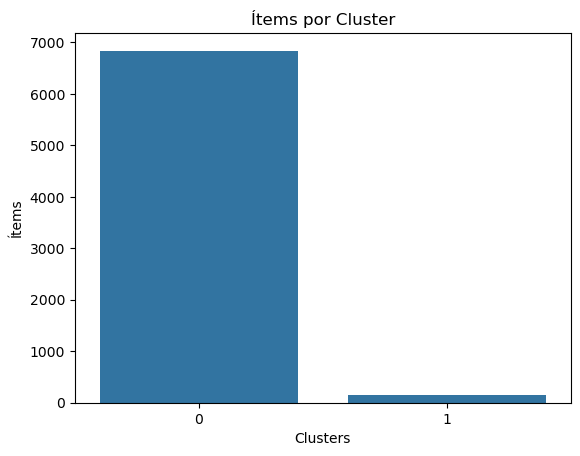

In [84]:
cluster_count = df_jer['Clusters2'].value_counts()

sns.barplot(x=cluster_count.index, y=cluster_count.values)
plt.xlabel('Clusters')
plt.ylabel('Ítems')
plt.title('Ítems por Cluster')
plt.show()

la mayoria de los valores se encuentran en el cluster 0

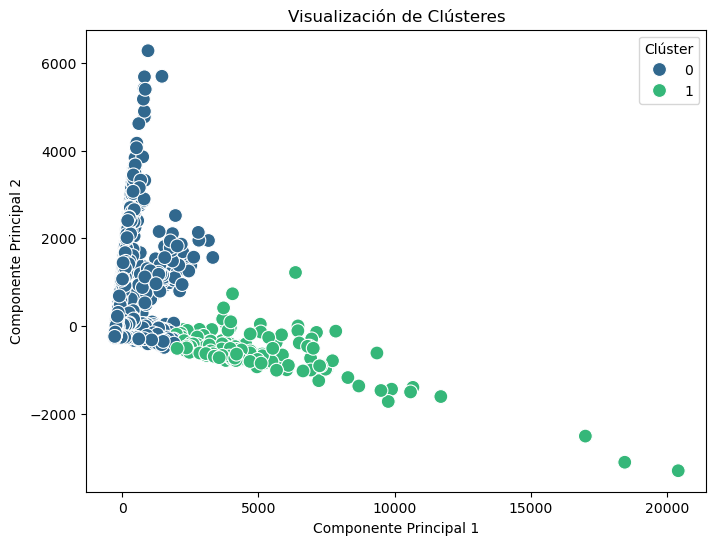

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', data=df_jer, hue='Clusters2', palette='viridis', s=100)
plt.title('Visualización de Clústeres')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()


el grafico obtenido es muy similar al obtenido con kmeans 

## Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [92]:
kmeans_silhouette = silhouette_score(df_kmeans, pred)
jer_silhouette = silhouette_score(df_jer, pred2)

print("Rendimiento Kmeans: {:.2f}%".format(kmeans_silhouette * 100))
print("Rendimiento Jerárquico: {:.2f}%".format(jer_silhouette * 100))

Rendimiento Kmeans: 81.49%
Rendimiento Jerárquico: 86.74%


In [ ]:
se puede observar que existe un mejor rendimiento con el metodo jerárquico